# Analysis of threat reports
This notebook contains cells to analyse threat reports on the threats and actors they describe.

### Build initial threat- and actor list from spreadsheet

In [2]:
import pandas as pd

file = "Threat reports.xlsx"
reports = pd.ExcelFile(file).parse('Threat reports')

In [48]:
# Build the lists
threatlist = []
actorlist = []

for index, row in reports.iterrows():
    threats = row['threats']
    if not pd.isna(threats):
        for threat in threats.split(", "):
            if threat not in threatlist and threat != "":
                threatlist.append(threat)

    actors = row['actors']
    if not pd.isna(actors):
        for actor in actors.split(", "):
            if actor not in actorlist:
                actorlist.append(actor)

print("Threats:\n",threatlist)
print("Threat actors:\n",actorlist)

Threats:
 ['ransomware', 'crypto malware', 'scams', 'adware', 'fleeceware', 'phishing', 'coinminers', 'information stealers', 'remote access trojans', 'technical support cams', 'rootkits', 'banking trojan', 'zoombombing', 'cryptojacking', 'malspam', 'exploit kits', 'remote access', 'spyware', 'remote access trojan', 'botnet', 'remote code execution', 'supply chain attacks', 'cryptominig', 'trojans', 'exploit kit', 'information stealer', 'business email compromise', 'brand abuse', 'supply chain attack', 'data exposure on code repositories', 'targeted threats on remote work', 'DDoS', 'proxy shell', 'account compromise', 'system compromise', 'botnets', 'wipers', 'server access', 'credential harvesting', 'misconfiguration', 'malicious insider', 'vulnerability exploitation', 'brute force', 'password spraying', 'DNS attack', 'credential stuffing', 'BGP rerouting', 'network pivot', 'network infrastructure compromise', 'local code execution', 'use of stolen credentials', 'pretexting', 'misdeli

### PDF Scanner

#### Init dictionaries

In [59]:
import PyPDF2
import os

report_folder = r"C:\Users\a.winters\NextCloud\Documents\Thesis\RQ1\Threat reports"
test_file = "Bugcrowd-Priority One Report 2022 Edition.pdf"
report_list = [file for file in os.listdir(report_folder) if file.endswith(".pdf")]

## Init threat dictionary to count occurences of threats per report
report_dict = {}  
for i in report_list:
    threat_dict = {}
    for j in threatlist:
        threat_dict[j] = 0
    report_dict[i] = threat_dict


In [63]:

# Iterate over PDFs in the folder
for file in report_list:
     # if file != test_file:
     #      continue
     print("Processing: ",file)
     search_term = threatlist[0]

     reader = PyPDF2.PdfFileReader(report_folder+"\\"+file)
     for page_number in range(0, reader.numPages):
          page = reader.getPage(page_number)
          page_content = page.extractText()
          for search_term in threatlist:
               if search_term in page_content:
                    report_dict[file][search_term] += 1

df = pd.DataFrame(report_dict)
display(df)

Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  Blackberry-report-bb-2021-threat-report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  Blackberry-report-bb-2022-threat-report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  Bugcrowd-Priority One Report 2022 Edition.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  Crowdstrike-Report2021ThreatHunting.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  Crowdstrike-Report2022GTR.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  cyberark-2022-identity-security-threat-landscape-report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  CyberEdge-2020-CDR-Report-v1.0.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  deepwatch-22-Prospect-Deepwatch-Threat-Intelligence-Report.pdf
Processing:  ENISA Threat Landscape 2022.pdf
Processing:  IBM-X-Force Threat Intelligence Index 2022 Full Report.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  PaloAltoNetworks-2022-unit42-incident-response-report-final.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  PaloAltoNetworks-2022-unit42-ransomware-threat-report-final.pdf


Xref table not zero-indexed. ID numbers for objects will be corrected.


Processing:  Rapid7 2021 Vulnerability Intelligence Report.pdf
Processing:  Verizon-2020-data-breach-investigations-report.pdf
Processing:  Verizon-2021-data-breach-investigations-report.pdf
Processing:  Verizon-2022-data-breach-investigations-report-dbir.pdf


,Blackberry-report-bb-2021-threat-report.pdf,Blackberry-report-bb-2022-threat-report.pdf,Bugcrowd-Priority One Report 2022 Edition.pdf,Crowdstrike-Report2021ThreatHunting.pdf,Crowdstrike-Report2022GTR.pdf,cyberark-2022-identity-security-threat-landscape-report.pdf,CyberEdge-2020-CDR-Report-v1.0.pdf,deepwatch-22-Prospect-Deepwatch-Threat-Intelligence-Report.pdf,ENISA Threat Landscape 2022.pdf,IBM-X-Force Threat Intelligence Index 2022 Full Report.pdf,PaloAltoNetworks-2022-unit42-incident-response-report-final.pdf,PaloAltoNetworks-2022-unit42-ransomware-threat-report-final.pdf,Rapid7 2021 Vulnerability Intelligence Report.pdf,Verizon-2020-data-breach-investigations-report.pdf,Verizon-2021-data-breach-investigations-report.pdf,Verizon-2022-data-breach-investigations-report-dbir.pdf
ransomware,17,20,8,7,12,7,6,2,48,32,18,36,12,18,14,19
crypto malware,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
scams,4,0,0,0,0,0,0,0,4,0,2,0,0,1,0,2
adware,0,0,0,0,0,0,0,0,4,3,0,0,0,0,0,0
fleeceware,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trojan,12,5,0,1,0,0,0,1,4,6,0,0,0,0,0,0
denial of service,0,0,0,0,0,0,1,0,5,1,1,1,1,1,0,0
loss,2,2,0,0,0,1,7,0,11,1,2,1,3,4,11,5
misconficuration,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Display statistics

<AxesSubplot:>

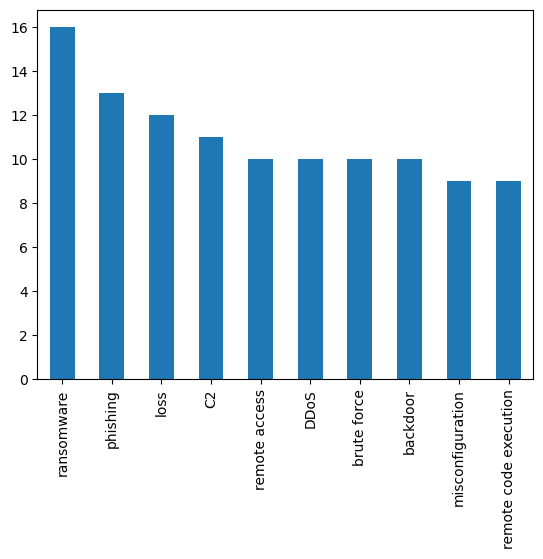

In [90]:
import matplotlib.pyplot as plt
import numpy as np

threat_occurences = df.gt(0).sum(axis=1)
threat_occurences.sort_values(inplace=True)

# Plot
threat_occurences.nlargest(10).plot(kind="bar")


In [78]:
threat_totals[threat_totals>0].count()

1101